# Notebook
https://www.kaggle.com/williamroe/bi-lstm-with-crf-for-ner

In [1]:
%pip install tensorflow==2.4.0  # 2.5.0  # 2.2.0

     |████████████████████████████████| 394.7 MB 3.7 kB/s  eta 0:00:01     |███████████████▍                | 189.1 MB 42.9 MB/s eta 0:00:05
     |████████████████████████████████| 132 kB 50.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 323 kB/s  eta 0:00:01
     |████████████████████████████████| 2.9 MB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 66.0 MB/s eta 0:00:01     |█████████▎                      | 1.7 MB 66.0 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 60.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 9.6 MB/s  eta 0:00:01
     |████████████████████████████████| 4.9 MB 63.2 MB/s eta 0:00:01
     |█████████████████████████████

In [2]:
# %pip install tensorflow_addons==0.13.0

In [3]:
# %pip install keras-crf==0.2.0

In [4]:
# %pip install tensorflow-cpu==2.4.0

In [5]:
# %pip install git+https://www.github.com/keras-team/keras-contrib.git
# # %pip install keras-contrib==0.1

In [6]:
# https://github.com/xuxingya/tf2crf
# %pip install tf2crf==0.1.32

In [7]:
# %env SM_FRAMEWORK=tf.keras

In [8]:
# %pip uninstall --yes tf-nightly

In [9]:
%pip install s3fs

Note: you may need to restart the kernel to use updated packages.


In [252]:
import numpy as np
import pandas as pd 
# import s3fs

what_corpus = 'polnear'
what_type_files = 'dev'
what_type_test_file = 'test'

# filepath = 's3://sagemaker-studio-528576943967-ssf9zkrg3os/polnear-conll/prepared/'
filepath = '../' + what_corpus + '-conll/prepared/'

In [253]:
train_filename = what_corpus + '_preprocessed_' + what_type_files + '_noBIO.csv'
df_train = pd.read_csv(filepath + train_filename, sep=";")

In [254]:
df_train[df_train['tag'].isna()]

,Unnamed: 0,filename,sentence_idx,word,tag


In [255]:
print(len(df_train.index))
del df_train['Unnamed: 0']
df_train.head(20)

78348


,filename,sentence_idx,word,tag
0,west-journal_2016-09-29_gold-star-mom-corners-...,1,Gold,O
1,west-journal_2016-09-29_gold-star-mom-corners-...,1,Star,O
2,west-journal_2016-09-29_gold-star-mom-corners-...,1,mom,O
3,west-journal_2016-09-29_gold-star-mom-corners-...,1,Corners,O
4,west-journal_2016-09-29_gold-star-mom-corners-...,1,Obama,O
5,west-journal_2016-09-29_gold-star-mom-corners-...,1,on,O
6,west-journal_2016-09-29_gold-star-mom-corners-...,1,he,SOURCE
7,west-journal_2016-09-29_gold-star-mom-corners-...,1,refusal,CUE
8,west-journal_2016-09-29_gold-star-mom-corners-...,1,to,CONTENT
9,west-journal_2016-09-29_gold-star-mom-corners-...,1,use,CONTENT


In [256]:
df_train[df_train['tag'].isna()]

,filename,sentence_idx,word,tag


In [257]:
test_filename = what_corpus + '_preprocessed_' + what_type_test_file + '_noBIO.csv'
df_test = pd.read_csv(filepath + test_filename, sep=";")

In [258]:
print(len(df_test.index))
del df_test['Unnamed: 0']
df_test.head(20)

73370


,filename,sentence_idx,word,tag
0,huff-post_2016-11-05_hillary-clinton-drops-int...,1,Hillary,O
1,huff-post_2016-11-05_hillary-clinton-drops-int...,1,Clinton,O
2,huff-post_2016-11-05_hillary-clinton-drops-int...,1,drops,O
3,huff-post_2016-11-05_hillary-clinton-drops-int...,1,Into,O
4,huff-post_2016-11-05_hillary-clinton-drops-int...,1,Detroit,O
5,huff-post_2016-11-05_hillary-clinton-drops-int...,1,as,O
6,huff-post_2016-11-05_hillary-clinton-drops-int...,1,Democrats,SOURCE
7,huff-post_2016-11-05_hillary-clinton-drops-int...,1,get,CUE
8,huff-post_2016-11-05_hillary-clinton-drops-int...,1,nervous,CUE
9,huff-post_2016-11-05_hillary-clinton-drops-int...,1,about,CUE


In [259]:
df_test[df_test['tag'].isna()]

,filename,sentence_idx,word,tag


In [260]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
#         agg_func = lambda s: ' '.join(s["word"].values.tolist())
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby(["filename", "sentence_idx"]).apply(agg_func)
#         self.grouped = self.dataset.groupby(["sentence_idx"]).apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [261]:
getter_train = SentenceGetter(df_train)
getter_test = SentenceGetter(df_test)

In [262]:
sentences_train= getter_train.sentences
sentences_test = getter_test.sentences

In [263]:
print(len(sentences_train))
print(len(sentences_train)/2)

3308
1654.0


In [264]:
sentences_train = sentences_train[0:15171]  # parc: 22352]
print(len(sentences_train))

3308


In [265]:
print(sentences_train[1])

[('the', 'SOURCE'), ('New', 'SOURCE'), ('York', 'SOURCE'), ('Post', 'SOURCE'), ('report', 'CUE'), ('that', 'CONTENT'), ('Hillary', 'CONTENT'), ('Clinton', 'CONTENT'), ("'s", 'CONTENT'), ('team', 'CONTENT'), ('avoid', 'CONTENT'), ('take', 'CONTENT'), ('she', 'CONTENT'), ('to', 'CONTENT'), ('the', 'CONTENT'), ('emergency', 'CONTENT'), ('room', 'CONTENT'), ('follow', 'CONTENT'), ('she', 'CONTENT'), ('medical', 'CONTENT'), ('scare', 'CONTENT'), ('on', 'CONTENT'), ('Sunday', 'CONTENT'), ('in', 'CONTENT'), ('order', 'CONTENT'), ('to', 'CONTENT'), ('``', 'CONTENT'), ('keep', 'CONTENT'), ('the', 'CONTENT'), ('detail', 'CONTENT'), ('of', 'CONTENT'), ('she', 'CONTENT'), ('medical', 'CONTENT'), ('treatment', 'CONTENT'), ('under', 'CONTENT'), ('wrap', 'CONTENT'), ('.', 'CONTENT'), ("''", 'CONTENT')]


In [266]:
# print(sentences_train[10])

In [267]:
print(len(sentences_test))

3022


In [268]:
# print(sentences_test[10])

In [269]:
maxlen = max([len(s) for s in sentences_train])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 95


In [270]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

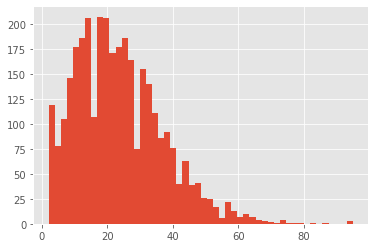

In [271]:
plt.hist([len(s) for s in sentences_train], bins=50)
plt.show()

In [272]:
words_train = ['', '[UNK]']
words_train.extend(list(set(df_train["word"].values)))
words_train.append("ENDPAD")
words_train[0:5]

['', '[UNK]', 'inner', 'witch', 'prayer']

In [276]:
sentences_texts_train = [' '.join([w[0] for w in s]) for s in sentences_train]
sentences_texts_train[1]

"the New York Post report that Hillary Clinton 's team avoid take she to the emergency room follow she medical scare on Sunday in order to `` keep the detail of she medical treatment under wrap . ''"

In [277]:
sentences_texts_test = [' '.join([w[0] for w in s]) for s in sentences_test]
sentences_texts_test[1]

'Washington -lrb- AFP -rrb- -- the Washington Post on Thursday become the latest US newspaper to emphatically endorse Hillary Clinton for the White House , say it be sway as much by she competence as by the alarming specter of a Donald Trump presidency .'

https://keras.io/examples/nlp/pretrained_word_embeddings/


In [278]:
from tensorflow.data import Dataset
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
# text_ds = Dataset.from_tensor_slices(df_train["word"].values).batch(128)
text_ds = Dataset.from_tensor_slices(sentences_texts_train).batch(128)
vectorizer.adapt(text_ds)

In [279]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'the', 'be', 'to']

In [280]:
# output = vectorizer([["the cat sat on the mat"]])
# output.numpy()[0, :6]

In [281]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [282]:
test = ["the", "be", "get", "on", "the"]
[word_index[w] for w in test]

[2, 3, 79, 16, 2]

In [283]:
from gensim.models import KeyedVectors
# word_vecs = KeyedVectors.load_word2vec_format("glove.txt") 
# https://www.kaggle.com/watts2/glove6b50dtxt
glove_dimensions = 50
!python -m gensim.scripts.glove2word2vec --input  glove.6B.50d.txt --output glove.6B.50d.w2vformat.txt
word_vecs = KeyedVectors.load_word2vec_format("glove.6B.50d.w2vformat.txt")

/Users/bettyvandongen/opt/anaconda3/lib/python3.8/runpy.py:127: RuntimeWarning: 'gensim.scripts.glove2word2vec' found in sys.modules after import of package 'gensim.scripts', but prior to execution of 'gensim.scripts.glove2word2vec'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-06-16 17:11:14,525 - glove2word2vec - INFO - running /Users/bettyvandongen/opt/anaconda3/lib/python3.8/site-packages/gensim/scripts/glove2word2vec.py --input glove.6B.50d.txt --output glove.6B.50d.w2vformat.txt
2021-06-16 17:11:14,671 - glove2word2vec - INFO - converting 400000 vectors from glove.6B.50d.txt to glove.6B.50d.w2vformat.txt
2021-06-16 17:11:15,085 - glove2word2vec - INFO - Converted model with 400000 vectors and 50 dimensions


In [284]:
word_vecs.word_vec('the')

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

In [285]:
# np.array(word_vecs.word_vec('the')).astype(np.float16)

In [286]:
num_tokens = len(voc) + 2
embedding_dim = glove_dimensions
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
# for i, word in enumerate(words_train):
#     embedding_vector = embeddings_index.get(word)
#     print(i)
    try:
        embedding_vector = word_vecs.word_vec(word)
#     if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
#     else:
    except KeyError:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 6464 words (459 misses)


In [287]:
words_test = list(set(df_test["word"].values))
words_test.append("ENDPAD")

In [288]:
n_words = len(words_train)
n_words

7441

In [289]:
df_train[df_train['tag'].isna()]

,filename,sentence_idx,word,tag


In [290]:
from math import nan

tags = []
for index, tag in enumerate(set(df_train["tag"].values)):
    if tag is nan or isinstance(tag, float):
        tags.append('unk')
    else:
        tags.append(tag)
print(tags)

['CONTENT', 'SOURCE', 'O', 'CUE']


In [291]:
n_tags = len(tags); n_tags

4

In [292]:
from future.utils import iteritems
word2idx_train = {w: i for i, w in enumerate(words_train)}
word2idx_test = {w: i for i, w in enumerate(words_test)}

tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [293]:
word2idx_train['the']

2218

In [294]:
# word2idx

In [295]:
tag2idx["O"]

2

In [296]:
print(tag2idx)

{'CONTENT': 0, 'SOURCE': 1, 'O': 2, 'CUE': 3}


In [297]:
idx2tag[3]

'CUE'

In [298]:
idx2tag

{0: 'CONTENT', 1: 'SOURCE', 2: 'O', 3: 'CUE'}

In [300]:
X_train = vectorizer(np.array([[s] for s in sentences_texts_train])).numpy()
X_test = vectorizer(np.array([[s] for s in sentences_texts_test])).numpy()


In [301]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# X_train = [[word2idx_train[w[0]] for w in s] for s in sentences_train]
# X_test = [[word2idx_test[w[0]] for w in s] for s in sentences_test]

In [302]:
print(X_train[10])

[  49    6    2  195   32    3 2728   37    3 1026   88  144    2  222
  101   11  737   29  270   40  379    4    3  737   18   12 1436    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [303]:
np.array(X_train).shape

(3308, 200)

In [304]:
X_train = pad_sequences(maxlen=maxlen, sequences=X_train, padding="post",value=n_words - 1)
print(X_train[10])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [305]:
X_test = pad_sequences(maxlen=maxlen, sequences=X_test, padding="post",value=n_words - 1)
print(X_test[10])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [306]:
y_idx_train = [[tag2idx[w[1]] for w in s] for s in sentences_train]
# print('sentences_train[25]')
# print(sentences_train[25])
# print('y_idx_train[25]')
# print(y_idx_train[25])
# print('sentences_train[10]')
# print(sentences_train[10])
# print('y_idx_train[10]')
# print(y_idx_train[10])
# print(len(y_idx_train[10]))

In [307]:
y_idx_test = [[tag2idx[w[1]] for w in s] for s in sentences_test]
# print('sentences_test[25]')
# print(sentences_test[25])
# print('y_idx_test[25]')
# print(y_idx_test[25])
# print('sentences_test[10]')
# print(sentences_test[10])
# print('y_idx_test[10]')
# print(y_idx_test[10])
# print(len(y_idx_test[10]))

In [308]:
y_train = pad_sequences(maxlen=maxlen, sequences=y_idx_train, padding="post", value=tag2idx["O"])
print(y_train[10])
print(len(y_train[10]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
95


In [309]:
y_test = pad_sequences(maxlen=maxlen, sequences=y_idx_test, padding="post", value=tag2idx["O"])
print(y_test[10])
print(len(y_test[10]))

[1 1 1 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
95


In [310]:
from tensorflow.keras.utils import to_categorical
y_train = [to_categorical(i, num_classes=n_tags) for i in y_train]
print(y_train[10][0])

[1. 0. 0. 0.]


In [311]:
y_test = [to_categorical(i, num_classes=n_tags) for i in y_test]
print(y_test[10][0])

[0. 1. 0. 0.]


In [312]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# X_train, y_train = X, y
# X_test, y_test = X, y

In [313]:
print(X_train[10][0])
print(X_test[10][0])
print(y_train[10][0])
print(y_test[10][0])

0
0
[1. 0. 0. 0.]
[0. 1. 0. 0.]


In [314]:
from tensorflow.keras.models import Model, Sequential  # , Input
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import tensorflow.keras as k
import tensorflow as tf

In [315]:
print(k.__version__)

2.5.0


In [316]:
# import tensorflow.keras.utils as generic_utils
# from keras_contrib.layers.crf import CRF
# AttributeError: module 'tensorflow.compat.v2' has no attribute '__internal__'

In [317]:
word_embedding_size = embedding_dim  # glove_dimensions  # 300

https://github.com/xuxingya/tf2crf

More inspiration:
https://github.com/Akshayc1/named-entity-recognition/blob/master/NER%20using%20Bidirectional%20LSTM%20-%20CRF%20.ipynb
https://www.kaggle.com/nikkisharma536/ner-with-bilstm-and-crf

In [318]:
# Kaggle example code 
from tensorflow.keras.initializers import Constant

# inputs = Input(shape=(None,), dtype="int64")  
inputs = Input(shape=(maxlen,))
# https://stackoverflow.com/questions/55770009/how-to-use-a-pre-trained-embedding-matrix-in-tensorflow-2-0-rnn-as-initial-weigh
# https://keras.io/examples/nlp/pretrained_word_embeddings/ --> pretrained embeddings
# outputs = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=maxlen)(inputs)
outputs = Embedding(num_tokens, embedding_dim, embeddings_initializer=Constant(embedding_matrix), trainable=False,)(inputs)
outputs = Bidirectional(LSTM(units=word_embedding_size, 
                             return_sequences=True, 
                             dropout=0.2,  #0.5, 
                             recurrent_dropout=0.2,  # 0.5, 
                             kernel_initializer=k.initializers.he_normal()))(outputs)
# https://github.com/xuxingya/tf2crf: Add internal kernel like CRF in keras_contrib, so now there is no need to stack a Dense layer before the CRF layer.
# outputs = Dense(n_tags, activation="relu")(outputs)  # previously softmax output layer
outputs = TimeDistributed(Dense(n_tags, activation="relu"))(outputs)  # previously softmax output layer
# outputs = TimeDistributed(Dense(n_tags, activation=tensorflow.keras.activations.softmax))(outputs)  # previously softmax output layer

# crf = CRF(n_tags)  # CRF layer
# out = crf(outputs)  # output
# model = Model(input, out)

# adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
adam = k.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999)


In [319]:
# Kaggle version (removed CRF code)

model = Model(inputs, outputs)

# https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible
# model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
# model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
# model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])# Saving the best only

In [320]:
# # Saving the best only
from tensorflow.keras.callbacks import ModelCheckpoint

# filepath="ner-bi-lstm-td-model-{val_accuracy:.2f}.hdf5"
filepath = 'tmp/checkpoint'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [321]:
# # tfcrf version
# model.fit(x=X_train, y=np.array(y_train), epochs=1, batch_size=2)
# model.save('tests/1')

In [322]:
# # Generate generalization metrics
# i = len(X_test) - 1 
# score = model.evaluate(np.array([X_test[:i]]), y_test, verbose=0)
# print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [323]:
# model.fit(X_train, np.array(y_train), batch_size=256, epochs=1, validation_split=0.1, verbose=1, callbacks=callbacks_list)
model.fit(X_train, np.array(y_train), batch_size=32, epochs=20, validation_split=0.1, verbose=1, callbacks=callbacks_list)

Epoch 1/20
94/94 [==============================] - 11s 84ms/step - loss: nan - accuracy: 0.1188 - val_loss: nan - val_accuracy: 0.1747

Epoch 00001: val_accuracy improved from -inf to 0.17465, saving model to tmp/checkpoint
INFO:tensorflow:Assets written to: tmp/checkpoint/assets
Epoch 2/20
94/94 [==============================] - 8s 80ms/step - loss: nan - accuracy: 0.1188 - val_loss: nan - val_accuracy: 0.1747

Epoch 00002: val_accuracy did not improve from 0.17465
Epoch 3/20
94/94 [==============================] - 8s 82ms/step - loss: nan - accuracy: 0.1188 - val_loss: nan - val_accuracy: 0.1747

Epoch 00003: val_accuracy did not improve from 0.17465
Epoch 4/20
94/94 [==============================] - 8s 87ms/step - loss: nan - accuracy: 0.1188 - val_loss: nan - val_accuracy: 0.1747

Epoch 00004: val_accuracy did not improve from 0.17465
Epoch 5/20
94/94 [==============================] - 8s 88ms/step - loss: nan - accuracy: 0.1188 - val_loss: nan - val_accuracy: 0.1747

Epoch 000

In [324]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 95)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 95, 50)            346250    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 95, 100)           40400     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 95, 4)             404       
Total params: 387,054
Trainable params: 40,804
Non-trainable params: 346,250
_________________________________________________________________


In [325]:
TP = {}
TN = {}
FP = {}
FN = {}
for tag in tag2idx.keys():
    TP[tag] = 0
    TN[tag] = 0    
    FP[tag] = 0    
    FN[tag] = 0    

def accumulate_score_by_tag(gt, pred):
    """
    For each tag keep stats
    """
    if gt == pred:
        TP[gt] += 1
    elif gt != 'O' and pred == 'O':
        FN[gt] +=1
    elif gt == 'O' and pred != 'O':
        FP[gt] += 1
    else:
        TN[gt] += 1

In [326]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [327]:
### Predict single sentence

In [328]:
# i = 2  # len(X_test) - 1  # Last one 
# p = model.predict(np.array([X_test[i]]))
# p = np.argmax(p, axis=-1)
# print(p.shape)
# gt = np.argmax(y_test[i], axis=-1)
# print(gt)
# print("{:14}: ({:5}): {}".format("Word", "True", "Pred"))
# print(p)
# for idx, (w,pred) in enumerate(zip(X_test[i],p[0])):
#     if words_test[w] == 'ENDPAD':
#         break
#     print("{:14}: ({:5}): {}".format(words_test[w],idx2tag[gt[idx]],tags[pred]))

In [329]:
p = model.predict(np.array(X_test))

In [330]:
p.shape

(3022, 95, 4)

In [331]:
# p

In [332]:
from sklearn.metrics import classification_report

In [333]:
axis = 2

In [334]:
np.argmax(p, axis=axis)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [335]:
print(classification_report(np.argmax(y_test, axis=axis).ravel(), np.argmax(p, axis=axis).ravel(),labels=list(idx2tag.keys()), target_names=list(idx2tag.values())))

              precision    recall  f1-score   support

     CONTENT       0.13      1.00      0.23     36620
      SOURCE       0.00      0.00      0.00      5695
           O       0.00      0.00      0.00    241018
         CUE       0.00      0.00      0.00      3757

    accuracy                           0.13    287090
   macro avg       0.03      0.25      0.06    287090
weighted avg       0.02      0.13      0.03    287090



/Users/bettyvandongen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
for i, sentence in enumerate(X_test):
    y_hat = np.argmax(p[i], axis=-1)
    gt = np.argmax(y_test[i], axis=-1)
    for idx, (w,pred) in enumerate(zip(sentence,y_hat)):
        accumulate_score_by_tag(idx2tag[gt[idx]],tags[pred])

In [337]:
for tag in tag2idx.keys():
    print(f'tag:{tag}')    
    print('\t TN:{:10}\tFP:{:10}'.format(TN[tag],FP[tag]))
    print('\t FN:{:10}\tTP:{:10}'.format(FN[tag],TP[tag]))  

tag:CONTENT
	 TN:         0	FP:         0
	 FN:         0	TP:     36620
tag:SOURCE
	 TN:      5695	FP:         0
	 FN:         0	TP:         0
tag:O
	 TN:         0	FP:    241018
	 FN:         0	TP:         0
tag:CUE
	 TN:      3757	FP:         0
	 FN:         0	TP:         0
